In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)
from datetime import timedelta
import pickle
import numpy as np
from tqdm import tqdm

In [3]:
df = pd.read_parquet("raw_hos_6hour.parquet")
#df['inpute_acuity'] = df.apply(lambda row: 1 if pd.isna(row['acuity']) else 0, axis=1)
#df['acuity'] = df['acuity'].replace(np.nan, 0)
#df.isna().sum()

In [7]:
df

,hadm_id,time,curr_service_CMED,curr_service_CSURG,curr_service_DENT,curr_service_ENT,curr_service_EYE,curr_service_GU,curr_service_GYN,curr_service_MED,curr_service_NMED,curr_service_NSURG,curr_service_OBS,curr_service_OMED,curr_service_ORTHO,curr_service_PSURG,curr_service_PSYCH,curr_service_SURG,curr_service_TRAUM,curr_service_TSURG,curr_service_VSURG,drug_acetaminophen,drug_aspirin,drug_bisacodyl,drug_docusatesodium,drug_furosemide,drug_heparin,drug_hydromorphone(dilaudid),drug_insulin,drug_lorazepam,drug_magnesiumsulfate,drug_metoprololtartrate,drug_morphinesulfate,drug_ondansetron,drug_oxycodone(immediaterelease),drug_pantoprazole,drug_potassiumchloride,drug_senna,drug_sodiumchloride0.9%flush,drug_vancomycin,abnormal,max_Basophils,max_Eosinophils,max_HCT,max_hemoglobin,max_Lymphocytes,max_MCH,max_MCHC,max_MCV,max_Monocytes,max_Neutrophils,max_Platelet,max_RDW,max_Red Blood Cells,max_WBC,max_ALT,max_Alb,max_Alk_Phos,max_AG,max_AST,max_bicarb,max_T_Bil,"max_Calcium, Total",max_Cl,max_SCr,max_Gl,max_Mg,max_PHOS,max_Potassium,max_Na,max_BUN,max_INR,max_PT,max_PTT,max_fibrinogen,max_thrombin,max_ldh,max_nt_probnp,max_baseexcess,max_paco2,max_PH,max_PaO2,max_ck_mb,max_tropt,max_CK,max_lactate,max_crp,max_D_Bil,max_fio2,max_d_dimer,max_ggt,max_o2sat,min_Basophils,min_Eosinophils,min_HCT,min_hemoglobin,min_Lymphocytes,min_MCH,min_MCHC,min_MCV,min_Monocytes,min_Neutrophils,min_Platelet,min_RDW,min_Red Blood Cells,min_WBC,min_ALT,min_Alb,min_Alk_Phos,min_AG,min_AST,min_bicarb,min_T_Bil,"min_Calcium, Total",min_Cl,min_SCr,min_Gl,min_Mg,min_PHOS,min_Potassium,min_Na,min_BUN,min_INR,min_PT,min_PTT,min_fibrinogen,min_thrombin,min_ldh,min_nt_probnp,min_baseexcess,min_paco2,min_PH,min_PaO2,min_ck_mb,min_tropt,min_CK,min_lactate,min_crp,min_D_Bil,min_fio2,min_d_dimer,min_ggt,min_o2sat,mean_Basophils,mean_Eosinophils,mean_HCT,mean_hemoglobin,mean_Lymphocytes,mean_MCH,mean_MCHC,mean_MCV,mean_Monocytes,mean_Neutrophils,mean_Platelet,mean_RDW,mean_Red Blood Cells,mean_WBC,mean_ALT,mean_Alb,mean_Alk_Phos,mean_AG,mean_AST,mean_bicarb,mean_T_Bil,"mean_Calcium, Total",mean_Cl,mean_SCr,mean_Gl,mean_Mg,mean_PHOS,mean_Potassium,mean_Na,mean_BUN,mean_INR,mean_PT,mean_PTT,mean_fibrinogen,mean_thrombin,mean_ldh,mean_nt_probnp,mean_baseexcess,mean_paco2,mean_PH,mean_PaO2,mean_ck_mb,mean_tropt,mean_CK,mean_lactate,mean_crp,mean_D_Bil,mean_fio2,mean_d_dimer,mean_ggt,mean_o2sat,inpute_max_Eosinophils,inpute_max_HCT,inpute_max_hemoglobin,inpute_max_Lymphocytes,inpute_max_MCH,inpute_max_MCHC,inpute_max_MCV,inpute_max_Monocytes,inpute_max_Neutrophils,inpute_max_Platelet,inpute_max_RDW,inpute_max_Red Blood Cells,inpute_max_WBC,inpute_max_ALT,inpute_max_Alb,inpute_max_Alk_Phos,inpute_max_AG,inpute_max_AST,inpute_max_bicarb,inpute_max_T_Bil,"inpute_max_Calcium, Total",inpute_max_Cl,inpute_max_SCr,inpute_max_Gl,inpute_max_Mg,inpute_max_PHOS,inpute_max_Potassium,inpute_max_Na,inpute_max_BUN,inpute_max_INR,inpute_max_PT,inpute_max_PTT,inpute_max_fibrinogen,inpute_max_thrombin,inpute_max_ldh,inpute_max_nt_probnp,inpute_max_baseexcess,inpute_max_paco2,inpute_max_PH,inpute_max_PaO2,inpute_max_ck_mb,inpute_max_tropt,inpute_max_CK,inpute_max_lactate,inpute_max_crp,inpute_max_D_Bil,inpute_max_fio2,inpute_max_d_dimer,inpute_max_ggt,inpute_max_o2sat,inpute_min_Basophils,inpute_min_Eosinophils,inpute_min_HCT,inpute_min_hemoglobin,inpute_min_Lymphocytes,inpute_min_MCH,inpute_min_MCHC,inpute_min_MCV,inpute_min_Monocytes,inpute_min_Neutrophils,inpute_min_Platelet,inpute_min_RDW,inpute_min_Red Blood Cells,inpute_min_WBC,inpute_min_ALT,inpute_min_Alb,inpute_min_Alk_Phos,inpute_min_AG,inpute_min_AST,inpute_min_bicarb,inpute_min_T_Bil,"inpute_min_Calcium, Total",inpute_min_Cl,inpute_min_SCr,inpute_min_Gl,inpute_min_Mg,inpute_min_PHOS,inpute_min_Potassium,inpute_min_Na,inpute_min_BUN,inpute_min_INR,inpute_min_PT,inpute_min_PTT,inpute_min_fibrinogen,inpute_min_thrombin,inpute_min_ldh,inpute_min_nt_probnp,inpute_min_baseexcess,inpute_min_paco2,inpute_min_PH,inpute_min_PaO2,inpute_mi

In [35]:
from sklearn.model_selection import train_test_split

positive_samples = df[df['label'] == 1]

unique_stay_ids = positive_samples['hadm_id'].unique()

train_stay_ids, test_stay_ids = train_test_split(unique_stay_ids, test_size=0.2, random_state=2023)

train_positive_samples = positive_samples[positive_samples['hadm_id'].isin(train_stay_ids)]
test_positive_samples = positive_samples[positive_samples['hadm_id'].isin(test_stay_ids)]

n_df=df[~df['hadm_id'].isin(unique_stay_ids)]

train_stay_, test_stay_ = train_test_split(n_df['hadm_id'].unique(), test_size=0.2, random_state=2023)

train_negative_samples = df[df['hadm_id'].isin(train_stay_)]
train_negative_samples = train_negative_samples.groupby(['hadm_id']).nth(1).reset_index()

test_negative_samples = df[df['hadm_id'].isin(test_stay_)]
test_negative_samples = test_negative_samples.groupby(['hadm_id']).nth(1).reset_index()

train_df = pd.concat([train_positive_samples, train_negative_samples])
test_df = pd.concat([test_positive_samples, test_negative_samples])


In [36]:
test_df['label'].value_counts()

label
0.0    9631
1.0    2507
Name: count, dtype: int64

In [121]:
m_df=df_1[df_1['stay_id'].isin(unique_stay_ids)]
m_dfdf=m_df.groupby(['stay_id']).first().reset_index()
m_dfdf=m_dfdf[m_dfdf[name]==0]

train_stay_icu, test_stay_icu = train_test_split(m_dfdf['stay_id'].unique(), test_size=0.2, random_state=2023)

train_stay_icu=m_dfdf[m_dfdf['stay_id'].isin(train_stay_icu)]
test_stay_icu=m_dfdf[m_dfdf['stay_id'].isin(test_stay_icu)]


train_df = pd.concat([train_df, train_stay_icu])
test_df = pd.concat([test_df, test_stay_icu])


In [37]:
train_x=train_df.drop(['hadm_id','time','label'],axis='columns')
train_y=train_df['label']
test_x=test_df.drop(['hadm_id','time','label'],axis='columns')
test_y=test_df['label']

In [38]:
train_df

,hadm_id,time,curr_service_CMED,curr_service_CSURG,curr_service_DENT,curr_service_ENT,curr_service_EYE,curr_service_GU,curr_service_GYN,curr_service_MED,curr_service_NMED,curr_service_NSURG,curr_service_OBS,curr_service_OMED,curr_service_ORTHO,curr_service_PSURG,curr_service_PSYCH,curr_service_SURG,curr_service_TRAUM,curr_service_TSURG,curr_service_VSURG,drug_acetaminophen,drug_aspirin,drug_bisacodyl,drug_docusatesodium,drug_furosemide,drug_heparin,drug_hydromorphone(dilaudid),drug_insulin,drug_lorazepam,drug_magnesiumsulfate,drug_metoprololtartrate,drug_morphinesulfate,drug_ondansetron,drug_oxycodone(immediaterelease),drug_pantoprazole,drug_potassiumchloride,drug_senna,drug_sodiumchloride0.9%flush,drug_vancomycin,abnormal,max_Basophils,max_Eosinophils,max_HCT,max_hemoglobin,max_Lymphocytes,max_MCH,max_MCHC,max_MCV,max_Monocytes,max_Neutrophils,max_Platelet,max_RDW,max_Red Blood Cells,max_WBC,max_ALT,max_Alb,max_Alk_Phos,max_AG,max_AST,max_bicarb,max_T_Bil,"max_Calcium, Total",max_Cl,max_SCr,max_Gl,max_Mg,max_PHOS,max_Potassium,max_Na,max_BUN,max_INR,max_PT,max_PTT,max_fibrinogen,max_thrombin,max_ldh,max_nt_probnp,max_baseexcess,max_paco2,max_PH,max_PaO2,max_ck_mb,max_tropt,max_CK,max_lactate,max_crp,max_D_Bil,max_fio2,max_d_dimer,max_ggt,max_o2sat,min_Basophils,min_Eosinophils,min_HCT,min_hemoglobin,min_Lymphocytes,min_MCH,min_MCHC,min_MCV,min_Monocytes,min_Neutrophils,min_Platelet,min_RDW,min_Red Blood Cells,min_WBC,min_ALT,min_Alb,min_Alk_Phos,min_AG,min_AST,min_bicarb,min_T_Bil,"min_Calcium, Total",min_Cl,min_SCr,min_Gl,min_Mg,min_PHOS,min_Potassium,min_Na,min_BUN,min_INR,min_PT,min_PTT,min_fibrinogen,min_thrombin,min_ldh,min_nt_probnp,min_baseexcess,min_paco2,min_PH,min_PaO2,min_ck_mb,min_tropt,min_CK,min_lactate,min_crp,min_D_Bil,min_fio2,min_d_dimer,min_ggt,min_o2sat,mean_Basophils,mean_Eosinophils,mean_HCT,mean_hemoglobin,mean_Lymphocytes,mean_MCH,mean_MCHC,mean_MCV,mean_Monocytes,mean_Neutrophils,mean_Platelet,mean_RDW,mean_Red Blood Cells,mean_WBC,mean_ALT,mean_Alb,mean_Alk_Phos,mean_AG,mean_AST,mean_bicarb,mean_T_Bil,"mean_Calcium, Total",mean_Cl,mean_SCr,mean_Gl,mean_Mg,mean_PHOS,mean_Potassium,mean_Na,mean_BUN,mean_INR,mean_PT,mean_PTT,mean_fibrinogen,mean_thrombin,mean_ldh,mean_nt_probnp,mean_baseexcess,mean_paco2,mean_PH,mean_PaO2,mean_ck_mb,mean_tropt,mean_CK,mean_lactate,mean_crp,mean_D_Bil,mean_fio2,mean_d_dimer,mean_ggt,mean_o2sat,inpute_max_Eosinophils,inpute_max_HCT,inpute_max_hemoglobin,inpute_max_Lymphocytes,inpute_max_MCH,inpute_max_MCHC,inpute_max_MCV,inpute_max_Monocytes,inpute_max_Neutrophils,inpute_max_Platelet,inpute_max_RDW,inpute_max_Red Blood Cells,inpute_max_WBC,inpute_max_ALT,inpute_max_Alb,inpute_max_Alk_Phos,inpute_max_AG,inpute_max_AST,inpute_max_bicarb,inpute_max_T_Bil,"inpute_max_Calcium, Total",inpute_max_Cl,inpute_max_SCr,inpute_max_Gl,inpute_max_Mg,inpute_max_PHOS,inpute_max_Potassium,inpute_max_Na,inpute_max_BUN,inpute_max_INR,inpute_max_PT,inpute_max_PTT,inpute_max_fibrinogen,inpute_max_thrombin,inpute_max_ldh,inpute_max_nt_probnp,inpute_max_baseexcess,inpute_max_paco2,inpute_max_PH,inpute_max_PaO2,inpute_max_ck_mb,inpute_max_tropt,inpute_max_CK,inpute_max_lactate,inpute_max_crp,inpute_max_D_Bil,inpute_max_fio2,inpute_max_d_dimer,inpute_max_ggt,inpute_max_o2sat,inpute_min_Basophils,inpute_min_Eosinophils,inpute_min_HCT,inpute_min_hemoglobin,inpute_min_Lymphocytes,inpute_min_MCH,inpute_min_MCHC,inpute_min_MCV,inpute_min_Monocytes,inpute_min_Neutrophils,inpute_min_Platelet,inpute_min_RDW,inpute_min_Red Blood Cells,inpute_min_WBC,inpute_min_ALT,inpute_min_Alb,inpute_min_Alk_Phos,inpute_min_AG,inpute_min_AST,inpute_min_bicarb,inpute_min_T_Bil,"inpute_min_Calcium, Total",inpute_min_Cl,inpute_min_SCr,inpute_min_Gl,inpute_min_Mg,inpute_min_PHOS,inpute_min_Potassium,inpute_min_Na,inpute_min_BUN,inpute_min_INR,inpute_min_PT,inpute_min_PTT,inpute_min_fibrinogen,inpute_min_thrombin,inpute_min_ldh,inpute_min_nt_probnp,inpute_min_baseexcess,inpute_min_paco2,inpute_min_PH,inpute_min_PaO2,inpute_mi

In [52]:
train_x=train_df.drop(['hadm_id','time','label','index'],axis='columns')
train_y=train_df['label']
test_x=test_df.drop(['hadm_id','time','label','index'],axis='columns')
test_y=test_df['label']

In [53]:
train_x

,curr_service_CMED,curr_service_CSURG,curr_service_DENT,curr_service_ENT,curr_service_EYE,curr_service_GU,curr_service_GYN,curr_service_MED,curr_service_NMED,curr_service_NSURG,curr_service_OBS,curr_service_OMED,curr_service_ORTHO,curr_service_PSURG,curr_service_PSYCH,curr_service_SURG,curr_service_TRAUM,curr_service_TSURG,curr_service_VSURG,drug_acetaminophen,drug_aspirin,drug_bisacodyl,drug_docusatesodium,drug_furosemide,drug_heparin,drug_hydromorphone(dilaudid),drug_insulin,drug_lorazepam,drug_magnesiumsulfate,drug_metoprololtartrate,drug_morphinesulfate,drug_ondansetron,drug_oxycodone(immediaterelease),drug_pantoprazole,drug_potassiumchloride,drug_senna,drug_sodiumchloride0.9%flush,drug_vancomycin,abnormal,max_Basophils,max_Eosinophils,max_HCT,max_hemoglobin,max_Lymphocytes,max_MCH,max_MCHC,max_MCV,max_Monocytes,max_Neutrophils,max_Platelet,max_RDW,max_Red Blood Cells,max_WBC,max_ALT,max_Alb,max_Alk_Phos,max_AG,max_AST,max_bicarb,max_T_Bil,"max_Calcium, Total",max_Cl,max_SCr,max_Gl,max_Mg,max_PHOS,max_Potassium,max_Na,max_BUN,max_INR,max_PT,max_PTT,max_fibrinogen,max_thrombin,max_ldh,max_nt_probnp,max_baseexcess,max_paco2,max_PH,max_PaO2,max_ck_mb,max_tropt,max_CK,max_lactate,max_crp,max_D_Bil,max_fio2,max_d_dimer,max_ggt,max_o2sat,min_Basophils,min_Eosinophils,min_HCT,min_hemoglobin,min_Lymphocytes,min_MCH,min_MCHC,min_MCV,min_Monocytes,min_Neutrophils,min_Platelet,min_RDW,min_Red Blood Cells,min_WBC,min_ALT,min_Alb,min_Alk_Phos,min_AG,min_AST,min_bicarb,min_T_Bil,"min_Calcium, Total",min_Cl,min_SCr,min_Gl,min_Mg,min_PHOS,min_Potassium,min_Na,min_BUN,min_INR,min_PT,min_PTT,min_fibrinogen,min_thrombin,min_ldh,min_nt_probnp,min_baseexcess,min_paco2,min_PH,min_PaO2,min_ck_mb,min_tropt,min_CK,min_lactate,min_crp,min_D_Bil,min_fio2,min_d_dimer,min_ggt,min_o2sat,mean_Basophils,mean_Eosinophils,mean_HCT,mean_hemoglobin,mean_Lymphocytes,mean_MCH,mean_MCHC,mean_MCV,mean_Monocytes,mean_Neutrophils,mean_Platelet,mean_RDW,mean_Red Blood Cells,mean_WBC,mean_ALT,mean_Alb,mean_Alk_Phos,mean_AG,mean_AST,mean_bicarb,mean_T_Bil,"mean_Calcium, Total",mean_Cl,mean_SCr,mean_Gl,mean_Mg,mean_PHOS,mean_Potassium,mean_Na,mean_BUN,mean_INR,mean_PT,mean_PTT,mean_fibrinogen,mean_thrombin,mean_ldh,mean_nt_probnp,mean_baseexcess,mean_paco2,mean_PH,mean_PaO2,mean_ck_mb,mean_tropt,mean_CK,mean_lactate,mean_crp,mean_D_Bil,mean_fio2,mean_d_dimer,mean_ggt,mean_o2sat,inpute_max_Eosinophils,inpute_max_HCT,inpute_max_hemoglobin,inpute_max_Lymphocytes,inpute_max_MCH,inpute_max_MCHC,inpute_max_MCV,inpute_max_Monocytes,inpute_max_Neutrophils,inpute_max_Platelet,inpute_max_RDW,inpute_max_Red Blood Cells,inpute_max_WBC,inpute_max_ALT,inpute_max_Alb,inpute_max_Alk_Phos,inpute_max_AG,inpute_max_AST,inpute_max_bicarb,inpute_max_T_Bil,"inpute_max_Calcium, Total",inpute_max_Cl,inpute_max_SCr,inpute_max_Gl,inpute_max_Mg,inpute_max_PHOS,inpute_max_Potassium,inpute_max_Na,inpute_max_BUN,inpute_max_INR,inpute_max_PT,inpute_max_PTT,inpute_max_fibrinogen,inpute_max_thrombin,inpute_max_ldh,inpute_max_nt_probnp,inpute_max_baseexcess,inpute_max_paco2,inpute_max_PH,inpute_max_PaO2,inpute_max_ck_mb,inpute_max_tropt,inpute_max_CK,inpute_max_lactate,inpute_max_crp,inpute_max_D_Bil,inpute_max_fio2,inpute_max_d_dimer,inpute_max_ggt,inpute_max_o2sat,inpute_min_Basophils,inpute_min_Eosinophils,inpute_min_HCT,inpute_min_hemoglobin,inpute_min_Lymphocytes,inpute_min_MCH,inpute_min_MCHC,inpute_min_MCV,inpute_min_Monocytes,inpute_min_Neutrophils,inpute_min_Platelet,inpute_min_RDW,inpute_min_Red Blood Cells,inpute_min_WBC,inpute_min_ALT,inpute_min_Alb,inpute_min_Alk_Phos,inpute_min_AG,inpute_min_AST,inpute_min_bicarb,inpute_min_T_Bil,"inpute_min_Calcium, Total",inpute_min_Cl,inpute_min_SCr,inpute_min_Gl,inpute_min_Mg,inpute_min_PHOS,inpute_min_Potassium,inpute_min_Na,inpute_min_BUN,inpute_min_INR,inpute_min_PT,inpute_min_PTT,inpute_min_fibrinogen,inpute_min_thrombin,inpute_min_ldh,inpute_min_nt_probnp,inpute_min_baseexcess,inpute_min_paco2,inpute_min_PH,inpute_min_PaO2,inpute_min_ck_mb,input

In [54]:
params = {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8,'eta' : 0.1, 'objective' : 'binary:logistic','eval_metric' : 'logloss','early_stoppings' : 70 }
    
    
#{'max_depth' : 5,'eta' : 0.1, 'objective' : 'binary:logistic','eval_metric' : 'logloss','early_stoppings' : 200 }

num_rounds = 600
#Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8,'eta' : 0.1, 'objective' : 'binary:logistic','eval_metric' : 'logloss','early_stoppings' : 200 }

In [55]:
#pip install xgboost

In [56]:
import xgboost as xgb
dtrain = xgb.DMatrix(data=train_x, label = train_y)
dtest = xgb.DMatrix(data=test_x, label=test_y)

In [57]:
#early_stopping_rounds = 10 

In [58]:
wlist = [(dtrain, 'train'), (dtest,'eval')]
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist,early_stopping_rounds=30)

/home/DAHS2/anaconda3/envs/SH/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [16:46:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "early_stoppings", "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-logloss:0.44273	eval-logloss:0.44946
[1]	train-logloss:0.39621	eval-logloss:0.41604
[2]	train-logloss:0.36098	eval-logloss:0.39383
[3]	train-logloss:0.33268	eval-logloss:0.37456
[4]	train-logloss:0.31239	eval-logloss:0.35722
[5]	train-logloss:0.29542	eval-logloss:0.34697
[6]	train-logloss:0.27983	eval-logloss:0.33862
[7]	train-logloss:0.26531	eval-logloss:0.33297
[8]	train-logloss:0.25443	eval-logloss:0.32885
[9]	train-logloss:0.24579	eval-logloss:0.32759
[10]	train-logloss:0.23743	eval-logloss:0.32255
[11]	train-logloss:0.22953	eval-logloss:0.32224
[12]	train-logloss:0.22507	eval-logloss:0.32136
[13]	train-logloss:0.21860	eval-logloss:0.31954
[14]	train-logloss:0.21390	eval-logloss:0.31569
[15]	train-logloss:0.20878	eval-logloss:0.31556
[16]	train-logloss:0.20454	eval-logloss:0.31610
[17]	train-logloss:0.20163	eval-logloss:0.31496
[18]	train-logloss:0.19794	eval-logloss:0.31435
[19]	train-logloss:0.19585	eval-logloss:0.31430
[20]	train-logloss:0.19259	eval-logloss:0.31531
[2

In [59]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix

def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [66]:
pred_probs = xgb_model.predict(dtest)
preds = [ 1 if x > 0.19  else 0 for x in pred_probs]

In [67]:
get_clf_eval(test_y, preds)

오차행렬:
 [[8841  790]
 [ 820 1687]]

정확도: 0.8674
정밀도: 0.6811
재현율: 0.6729
F1: 0.6770
AUC: 0.7954


In [68]:
from sklearn.metrics import average_precision_score
sklearn_AUPRC = average_precision_score(test_y, preds)
print(sklearn_AUPRC)

0.5258563999253107


In [69]:
from sklearn.metrics import classification_report, confusion_matrix

classification_rep = classification_report(test_y, preds)
confusion_mat = confusion_matrix(test_y, preds)

print("Classification Report:")
print(classification_rep)

print("\nConfusion Matrix:")
print(confusion_mat)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      9631
         1.0       0.68      0.67      0.68      2507

    accuracy                           0.87     12138
   macro avg       0.80      0.80      0.80     12138
weighted avg       0.87      0.87      0.87     12138


Confusion Matrix:
[[8841  790]
 [ 820 1687]]


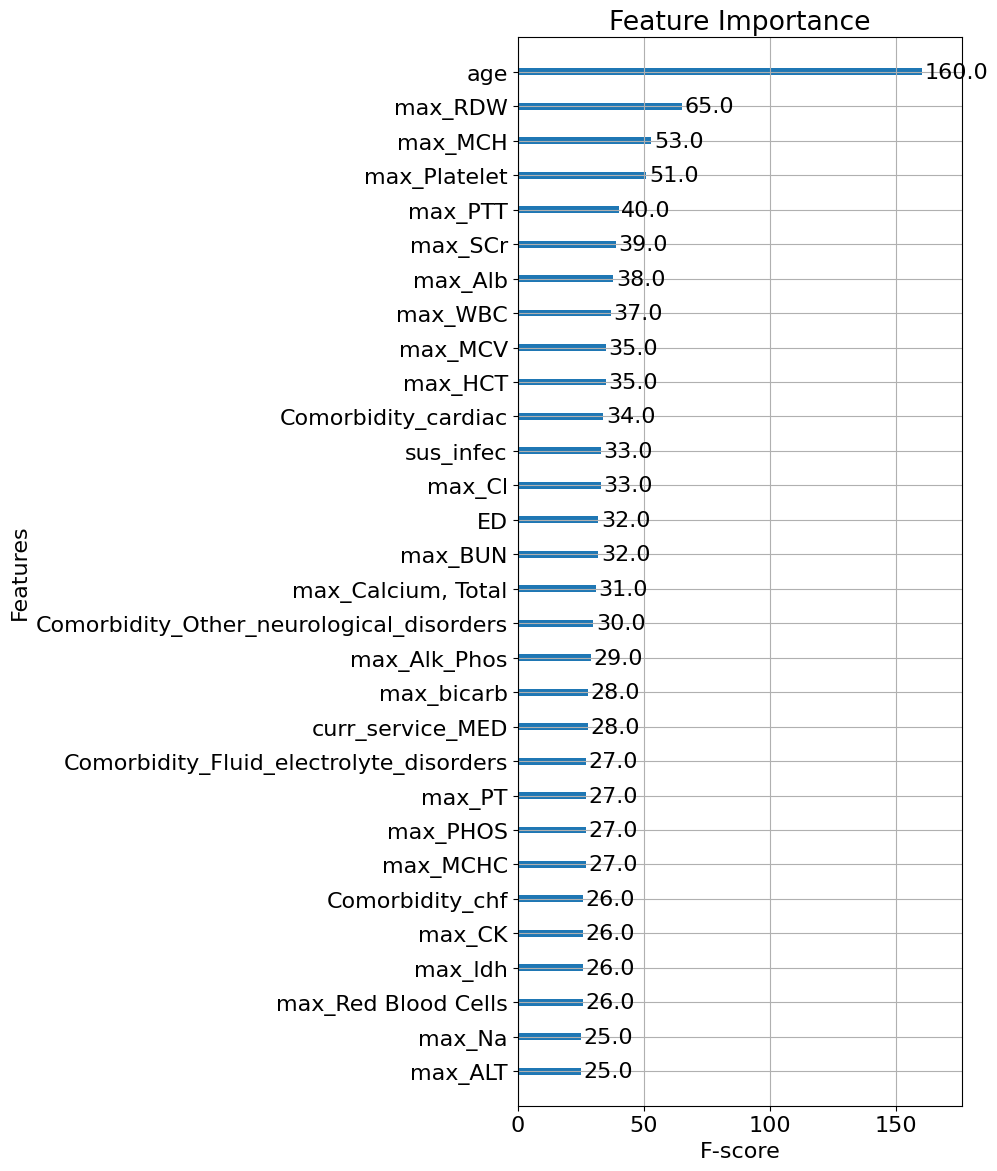

In [70]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16
fig, ax = plt.subplots(figsize=(10, 12))

plot_importance(xgb_model, ax=ax, importance_type='weight',max_num_features=30)

plt.xlabel('F-score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.tight_layout()

plt.show()


In [134]:
df

,stay_id,time,max_temp,max_hr,max_resp,max_o2sat,max_sbp,max_dbp,min_temp,min_hr,min_resp,min_o2sat,min_sbp,min_dbp,avg_temp,avg_hr,avg_resp,avg_o2sat,avg_sbp,avg_dbp,before_max_temp,before_max_hr,before_max_resp,before_max_o2sat,before_max_sbp,before_max_dbp,before_min_temp,before_min_hr,before_min_resp,before_min_o2sat,before_min_sbp,before_min_dbp,before_avg_temp,before_avg_hr,before_avg_resp,before_avg_o2sat,before_avg_sbp,before_avg_dbp,drug_Ipratropium Bromide,drug_acetaminophen,drug_albuterol,drug_aspirin,drug_azithromycin,drug_ceftriaxone,drug_ciprofloxacin,drug_diazepam,drug_diphenhydramine,drug_fentanyl,drug_furosemide,drug_heparin,drug_hydromorphone,drug_ibuprofen,drug_ketorolac,drug_lidocaine,drug_lorazepam,drug_metoclopramide,drug_morphine,drug_ondansetron,drug_oxycodone,drug_oxycodone-acetaminophen,drug_vancomycin,before_drug_Ipratropium Bromide,before_drug_acetaminophen,before_drug_albuterol,before_drug_aspirin,before_drug_azithromycin,before_drug_ceftriaxone,before_drug_ciprofloxacin,before_drug_diazepam,before_drug_diphenhydramine,before_drug_fentanyl,before_drug_furosemide,before_drug_heparin,before_drug_hydromorphone,before_drug_ibuprofen,before_drug_ketorolac,before_drug_lidocaine,before_drug_lorazepam,before_drug_metoclopramide,before_drug_morphine,before_drug_ondansetron,before_drug_oxycodone,before_drug_oxycodone-acetaminophen,before_drug_vancomycin,inpute_max_temp,inpute_max_hr,inpute_max_resp,inpute_max_o2sat,inpute_max_sbp,inpute_max_dbp,inpute_min_temp,inpute_min_hr,inpute_min_resp,inpute_min_o2sat,inpute_min_sbp,inpute_min_dbp,inpute_avg_temp,inpute_avg_hr,inpute_avg_resp,inpute_avg_o2sat,inpute_avg_sbp,inpute_avg_dbp,inpute_before_max_temp,inpute_before_max_hr,inpute_before_max_resp,inpute_before_max_o2sat,inpute_before_max_sbp,inpute_before_max_dbp,inpute_before_min_temp,inpute_before_min_hr,inpute_before_min_resp,inpute_before_min_o2sat,inpute_before_min_sbp,inpute_before_min_dbp,inpute_before_avg_temp,inpute_before_avg_hr,inpute_before_avg_resp,inpute_before_avg_o2sat,inpute_before_avg_sbp,inpute_before_avg_dbp,acuity,abdpain,fever,dizziness,chestpain,dyspnea,Comorbidity_Alcohol_abuse,Comorbidity_Chronic_pulmonary_disease,Comorbidity_Diabetes_complicated,Comorbidity_Diabetes_uncomplicated,Comorbidity_Fluid_electrolyte_disorders,Comorbidity_Other_neurological_disorders,Comorbidity_Renal_failure,Comorbidity_cardiac,Comorbidity_chf,Comorbidity_hypertension_uncomplicated,tri_temperature,tri_heartrate,tri_resprate,tri_o2sat,tri_sbp,tri_dbp,inpute_tri_temperature,inpute_tri_heartrate,inpute_tri_resprate,inpute_tri_o2sat,inpute_tri_sbp,inpute_tri_dbp,label_after_1hour,label_after_2hour,label_after_3hour,label_after_4hour,label_after_5hour,label_after_6hour,gender_F,gender_M,race_Black,race_Other,race_White,arrival_transport_AMBULANCE,arrival_transport_HELICOPTER,arrival_transport_OTHER,arrival_transport_WALK IN,inpute_acuity
0,30000012,2126-02-14 23:22:00,37.111111,96.0,18.0,93.0,160.0,54.0,37.111111,96.0,18.0,93.0,160.0,54.0,37.111111,96.000000,18.000000,93.000000,160.000000,54.000000,37.111111,96.0,18.0,93.0,160.0,54.0,37.111111,96.0,18.0,93.0,160.0,54.0,37.111111,96.000000,18.000000,93.0,160.000000,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,37.111111,96.0,18.0,93.0,160.0,54.0,0,0,0,0,0,0,0.0,0.0,2.0,2.0,2.0,2.0,1,0,0,0,1,1,0,0,0,0
1,30000012,2126-02-15 00:22:00,0.000000,80.0,13.0,99.0,112.0,44.0,0.000000,80.0,13.0,99.0,112.0,44.0,0.000000,80.000000,13.000000,99.000000,112.000000,44.000000,37.111111,96.0,18.0,93.0,160.0,54.0,37.111111,96.0,18.0,93.0,160.0,54.0,37.111111,96.000000,18.000000,93.0,160.000000,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [135]:
df_2=df.drop(['stay_id','time','label_after_1hour','label_after_2hour','label_after_3hour','label_after_4hour','label_after_5hour','label_after_6hour'],axis='columns')

In [138]:
dt = xgb.DMatrix(data=df_2)

# Risk_Score

In [139]:
result=pd.DataFrame(xgb_model.predict(dt))

ValueError: feature_names mismatch: ['max_temp', 'max_hr', 'max_resp', 'max_o2sat', 'max_sbp', 'max_dbp', 'min_temp', 'min_hr', 'min_resp', 'min_o2sat', 'min_sbp', 'min_dbp', 'avg_temp', 'avg_hr', 'avg_resp', 'avg_o2sat', 'avg_sbp', 'avg_dbp', 'before_max_temp', 'before_max_hr', 'before_max_resp', 'before_max_o2sat', 'before_max_sbp', 'before_max_dbp', 'before_min_temp', 'before_min_hr', 'before_min_resp', 'before_min_o2sat', 'before_min_sbp', 'before_min_dbp', 'before_avg_temp', 'before_avg_hr', 'before_avg_resp', 'before_avg_o2sat', 'before_avg_sbp', 'before_avg_dbp', 'drug_Ipratropium Bromide', 'drug_acetaminophen', 'drug_albuterol', 'drug_aspirin', 'drug_azithromycin', 'drug_ceftriaxone', 'drug_ciprofloxacin', 'drug_diazepam', 'drug_diphenhydramine', 'drug_fentanyl', 'drug_furosemide', 'drug_heparin', 'drug_hydromorphone', 'drug_ibuprofen', 'drug_ketorolac', 'drug_lidocaine', 'drug_lorazepam', 'drug_metoclopramide', 'drug_morphine', 'drug_ondansetron', 'drug_oxycodone', 'drug_oxycodone-acetaminophen', 'drug_vancomycin', 'before_drug_Ipratropium Bromide', 'before_drug_acetaminophen', 'before_drug_albuterol', 'before_drug_aspirin', 'before_drug_azithromycin', 'before_drug_ceftriaxone', 'before_drug_ciprofloxacin', 'before_drug_diazepam', 'before_drug_diphenhydramine', 'before_drug_fentanyl', 'before_drug_furosemide', 'before_drug_heparin', 'before_drug_hydromorphone', 'before_drug_ibuprofen', 'before_drug_ketorolac', 'before_drug_lidocaine', 'before_drug_lorazepam', 'before_drug_metoclopramide', 'before_drug_morphine', 'before_drug_ondansetron', 'before_drug_oxycodone', 'before_drug_oxycodone-acetaminophen', 'before_drug_vancomycin', 'inpute_max_temp', 'inpute_max_hr', 'inpute_max_resp', 'inpute_max_o2sat', 'inpute_max_sbp', 'inpute_max_dbp', 'inpute_min_temp', 'inpute_min_hr', 'inpute_min_resp', 'inpute_min_o2sat', 'inpute_min_sbp', 'inpute_min_dbp', 'inpute_avg_temp', 'inpute_avg_hr', 'inpute_avg_resp', 'inpute_avg_o2sat', 'inpute_avg_sbp', 'inpute_avg_dbp', 'inpute_before_max_temp', 'inpute_before_max_hr', 'inpute_before_max_resp', 'inpute_before_max_o2sat', 'inpute_before_max_sbp', 'inpute_before_max_dbp', 'inpute_before_min_temp', 'inpute_before_min_hr', 'inpute_before_min_resp', 'inpute_before_min_o2sat', 'inpute_before_min_sbp', 'inpute_before_min_dbp', 'inpute_before_avg_temp', 'inpute_before_avg_hr', 'inpute_before_avg_resp', 'inpute_before_avg_o2sat', 'inpute_before_avg_sbp', 'inpute_before_avg_dbp', 'acuity', 'abdpain', 'fever', 'dizziness', 'chestpain', 'dyspnea', 'Comorbidity_Alcohol_abuse', 'Comorbidity_Chronic_pulmonary_disease', 'Comorbidity_Diabetes_complicated', 'Comorbidity_Diabetes_uncomplicated', 'Comorbidity_Fluid_electrolyte_disorders', 'Comorbidity_Other_neurological_disorders', 'Comorbidity_Renal_failure', 'Comorbidity_cardiac', 'Comorbidity_chf', 'Comorbidity_hypertension_uncomplicated', 'tri_temperature', 'tri_heartrate', 'tri_resprate', 'tri_o2sat', 'tri_sbp', 'tri_dbp', 'inpute_tri_temperature', 'inpute_tri_heartrate', 'inpute_tri_resprate', 'inpute_tri_o2sat', 'inpute_tri_sbp', 'inpute_tri_dbp', 'gender_F', 'gender_M', 'race_Black', 'race_Other', 'race_White', 'arrival_transport_AMBULANCE', 'arrival_transport_HELICOPTER', 'arrival_transport_OTHER', 'arrival_transport_WALK IN', 'inpute_acuity', 'index'] ['max_temp', 'max_hr', 'max_resp', 'max_o2sat', 'max_sbp', 'max_dbp', 'min_temp', 'min_hr', 'min_resp', 'min_o2sat', 'min_sbp', 'min_dbp', 'avg_temp', 'avg_hr', 'avg_resp', 'avg_o2sat', 'avg_sbp', 'avg_dbp', 'before_max_temp', 'before_max_hr', 'before_max_resp', 'before_max_o2sat', 'before_max_sbp', 'before_max_dbp', 'before_min_temp', 'before_min_hr', 'before_min_resp', 'before_min_o2sat', 'before_min_sbp', 'before_min_dbp', 'before_avg_temp', 'before_avg_hr', 'before_avg_resp', 'before_avg_o2sat', 'before_avg_sbp', 'before_avg_dbp', 'drug_Ipratropium Bromide', 'drug_acetaminophen', 'drug_albuterol', 'drug_aspirin', 'drug_azithromycin', 'drug_ceftriaxone', 'drug_ciprofloxacin', 'drug_diazepam', 'drug_diphenhydramine', 'drug_fentanyl', 'drug_furosemide', 'drug_heparin', 'drug_hydromorphone', 'drug_ibuprofen', 'drug_ketorolac', 'drug_lidocaine', 'drug_lorazepam', 'drug_metoclopramide', 'drug_morphine', 'drug_ondansetron', 'drug_oxycodone', 'drug_oxycodone-acetaminophen', 'drug_vancomycin', 'before_drug_Ipratropium Bromide', 'before_drug_acetaminophen', 'before_drug_albuterol', 'before_drug_aspirin', 'before_drug_azithromycin', 'before_drug_ceftriaxone', 'before_drug_ciprofloxacin', 'before_drug_diazepam', 'before_drug_diphenhydramine', 'before_drug_fentanyl', 'before_drug_furosemide', 'before_drug_heparin', 'before_drug_hydromorphone', 'before_drug_ibuprofen', 'before_drug_ketorolac', 'before_drug_lidocaine', 'before_drug_lorazepam', 'before_drug_metoclopramide', 'before_drug_morphine', 'before_drug_ondansetron', 'before_drug_oxycodone', 'before_drug_oxycodone-acetaminophen', 'before_drug_vancomycin', 'inpute_max_temp', 'inpute_max_hr', 'inpute_max_resp', 'inpute_max_o2sat', 'inpute_max_sbp', 'inpute_max_dbp', 'inpute_min_temp', 'inpute_min_hr', 'inpute_min_resp', 'inpute_min_o2sat', 'inpute_min_sbp', 'inpute_min_dbp', 'inpute_avg_temp', 'inpute_avg_hr', 'inpute_avg_resp', 'inpute_avg_o2sat', 'inpute_avg_sbp', 'inpute_avg_dbp', 'inpute_before_max_temp', 'inpute_before_max_hr', 'inpute_before_max_resp', 'inpute_before_max_o2sat', 'inpute_before_max_sbp', 'inpute_before_max_dbp', 'inpute_before_min_temp', 'inpute_before_min_hr', 'inpute_before_min_resp', 'inpute_before_min_o2sat', 'inpute_before_min_sbp', 'inpute_before_min_dbp', 'inpute_before_avg_temp', 'inpute_before_avg_hr', 'inpute_before_avg_resp', 'inpute_before_avg_o2sat', 'inpute_before_avg_sbp', 'inpute_before_avg_dbp', 'acuity', 'abdpain', 'fever', 'dizziness', 'chestpain', 'dyspnea', 'Comorbidity_Alcohol_abuse', 'Comorbidity_Chronic_pulmonary_disease', 'Comorbidity_Diabetes_complicated', 'Comorbidity_Diabetes_uncomplicated', 'Comorbidity_Fluid_electrolyte_disorders', 'Comorbidity_Other_neurological_disorders', 'Comorbidity_Renal_failure', 'Comorbidity_cardiac', 'Comorbidity_chf', 'Comorbidity_hypertension_uncomplicated', 'tri_temperature', 'tri_heartrate', 'tri_resprate', 'tri_o2sat', 'tri_sbp', 'tri_dbp', 'inpute_tri_temperature', 'inpute_tri_heartrate', 'inpute_tri_resprate', 'inpute_tri_o2sat', 'inpute_tri_sbp', 'inpute_tri_dbp', 'gender_F', 'gender_M', 'race_Black', 'race_Other', 'race_White', 'arrival_transport_AMBULANCE', 'arrival_transport_HELICOPTER', 'arrival_transport_OTHER', 'arrival_transport_WALK IN', 'inpute_acuity']
expected index in input data

In [89]:
risf_df=pd.concat([df, result], axis=1) 
risf_df=risf_df[['stay_id',0]]

In [90]:
risf_df.rename(columns={0: 'risk_1'}, inplace=True)

In [91]:
risf_df

,stay_id,risk_1
0,30000012,0.010947
1,30000012,0.999998
2,30000012,0.999842
3,30000038,0.001191
4,30000039,0.000972
...,...,...
1156496,39999961,0.990796
1156497,39999961,0.990796
1156498,39999961,0.994994
1156499,39999961,0.894738


In [121]:
risf_df=pd.concat([risf_df, result], axis=1) 
risf_df
#risf_df=risf_df[['stay_id',0]]

,stay_id,risk_1,0
0,30000012,0.077292,0.013077
1,30000012,1.000000,0.999999
2,30000012,0.999980,0.999619
3,30000038,0.003706,0.004014
4,30000039,0.004722,0.004770
...,...,...,...
1156496,39999961,0.951898,0.995443
1156497,39999961,0.951898,0.995443
1156498,39999961,0.996524,0.936643
1156499,39999961,0.973527,0.600052


In [122]:
risf_df.rename(columns={0: 'risk_2'}, inplace=True)
#risf_df.rename(columns={risf_df.columns[2]: 'risk_1'}, inplace=True)

In [125]:
#risf_df.to_csv('risk.csv',index=False)

In [49]:
risf_df['sum']=risf_df['risk_1']+risf_df['risk_2']

In [126]:
risf_df

,stay_id,risk_1,risk_2
0,30000012,0.077292,0.013077
1,30000012,1.000000,0.999999
2,30000012,0.999980,0.999619
3,30000038,0.003706,0.004014
4,30000039,0.004722,0.004770
...,...,...,...
1156496,39999961,0.951898,0.995443
1156497,39999961,0.951898,0.995443
1156498,39999961,0.996524,0.936643
1156499,39999961,0.973527,0.600052


In [92]:
dfdf=pd.read_csv('pre_ED_v0.4.csv')
dfdf[['result']]

,result
0,hos
1,hos
2,hos
3,hos
4,hos
...,...
1156496,hos
1156497,hos
1156498,hos
1156499,hos


In [93]:
dfdf=dfdf[['result']]

In [94]:
risf_df=pd.concat([risf_df, dfdf], axis=1) 
risf_df

,stay_id,risk_1,result
0,30000012,0.010947,hos
1,30000012,0.999998,hos
2,30000012,0.999842,hos
3,30000038,0.001191,hos
4,30000039,0.000972,hos
...,...,...,...
1156496,39999961,0.990796,hos
1156497,39999961,0.990796,hos
1156498,39999961,0.994994,hos
1156499,39999961,0.894738,hos


In [95]:
risf_df['seq'] = risf_df.groupby('stay_id').cumcount() + 1

In [37]:
risf_df

,stay_id,risk_1,result,seq
0,30000012,0.010311,hos,1
1,30000012,0.999999,hos,2
2,30000012,0.999817,hos,3
3,30000038,0.001746,hos,1
4,30000039,0.006685,hos,1
...,...,...,...,...
1156496,39999961,0.538625,hos,2
1156497,39999961,0.538625,hos,3
1156498,39999961,0.958503,hos,4
1156499,39999961,0.388293,hos,5


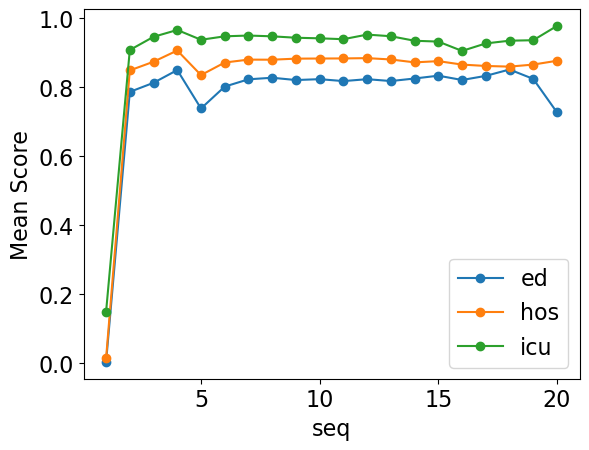

In [96]:
import matplotlib.pyplot as plt

mean_scores_df = risf_df.groupby(['result', 'seq'])['risk_1'].mean().reset_index()

for name, group in mean_scores_df.groupby('result'):
    plt.plot(group['seq'], group['risk_1'], marker='o', label=name)

plt.xlabel('seq')
plt.ylabel('Mean Score')
plt.legend()

plt.show()

In [270]:
mean_scores_df = risf_df.groupby(['result', 'seq'])[0].mean().reset_index()

In [274]:
#mean_scores_df.to_csv('mean_scores.csv')

In [58]:
#risf_df.to_csv('ML_result_1.csv',index=0)

In [59]:
#ML_result=pd.read_csv('ML_result_1.csv')

In [133]:
risf_df

,stay_id,risk_1,risk_2,result,seq
0,30000012,0.077292,0.013077,hos,1
1,30000012,1.000000,0.999999,hos,2
2,30000012,0.999980,0.999619,hos,3
3,30000038,0.003706,0.004014,hos,1
4,30000039,0.004722,0.004770,hos,1
...,...,...,...,...,...
1156496,39999961,0.951898,0.995443,hos,2
1156497,39999961,0.951898,0.995443,hos,3
1156498,39999961,0.996524,0.936643,hos,4
1156499,39999961,0.973527,0.600052,hos,5


In [104]:
stay_id_counts = risf_df['stay_id'].value_counts()

stay_ids_to_remove = stay_id_counts[stay_id_counts <= 3].index

risf_df = risf_df[~risf_df['stay_id'].isin(stay_ids_to_remove)]


In [105]:
risf_df
risk_1=risf_df[['stay_id','risk_1','seq']]
#risk_2=risf_df[['stay_id','risk_2','seq']]

In [106]:
risf_df

,stay_id,risk_1,result,seq
4,30000039,0.000972,hos,1
5,30000039,0.815413,hos,2
6,30000039,0.999438,hos,3
7,30000039,0.999999,hos,4
8,30000039,0.984690,hos,5
...,...,...,...,...
1156496,39999961,0.990796,hos,2
1156497,39999961,0.990796,hos,3
1156498,39999961,0.994994,hos,4
1156499,39999961,0.894738,hos,5


In [92]:
#ML_result.rename(columns={'0': 'score'}, inplace=True)

In [107]:
pivot_data_1 = risk_1.pivot(index='stay_id', columns='seq', values='risk_1').fillna(np.nan)
pivot_data_1

seq,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
stay_id,,,,,,,,,,,,,,,,,,,,
30000039,0.000972,0.815413,0.999438,0.999999,0.984690,0.972648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30000094,0.003880,0.998601,0.999001,0.999890,0.999127,0.996847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30000202,0.007239,0.852952,0.998114,0.998114,0.968080,0.797061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30000262,0.000567,0.978482,0.998939,0.998939,0.999892,0.978504,0.998165,0.976917,0.196485,0.862697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30000275,0.000097,0.683421,0.392224,0.679282,0.070233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39999679,0.000555,0.932523,0.932523,0.932523,0.001826,0.001826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39999828,0.022705,0.966425,0.966425,0.999725,0.692105,0.856162,0.940914,0.999980,0.999993,1.000000,0.999996,0.999996,0.999999,0.999999,0.999999,0.999989,0.999989,0.999765,NaN,NaN
39999835,0.004246,0.993178,1.000000,1.000000,1.000000,0.999985,0.935530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
#pivot_data_2 = risk_2.pivot(index='stay_id', columns='seq', values='risk_2').fillna(np.nan)
#pivot_data_2

seq,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
stay_id,,,,,,,,,,,,,,,,,,,,
30000012,0.013077,0.999999,0.999619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30000039,0.004770,0.865938,0.999335,0.999999,0.956831,0.984237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30000094,0.006598,0.999132,0.998974,0.999931,0.999442,0.991306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30000177,0.006063,0.997729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30000202,0.030149,0.421356,0.986419,0.986419,0.993920,0.975999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39999835,0.005315,0.994114,1.000000,1.000000,1.000000,0.999994,0.978282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39999863,0.011549,0.999641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39999933,0.001265,0.995917,0.999988,0.999988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
numpy_array_1 = pivot_data_1.to_numpy()
#numpy_array_2 = pivot_data_2.to_numpy()

#resulting_array = np.stack((numpy_array_1, numpy_array_2), axis=2)

In [143]:
resulting_array.shape

(231717, 20, 2)

In [66]:
numpy_array_1

array([[6.6852761e-03, 9.5753849e-01, 9.9970752e-01, ...,           nan,
                  nan,           nan],
       [3.3624631e-03, 9.9342608e-01, 9.9287134e-01, ...,           nan,
                  nan,           nan],
       [7.1055358e-03, 5.7022941e-01, 9.9265552e-01, ...,           nan,
                  nan,           nan],
       ...,
       [5.5940216e-03, 9.9947411e-01, 1.0000000e+00, ...,           nan,
                  nan,           nan],
       [6.8040163e-04, 9.9569857e-01, 9.9999774e-01, ...,           nan,
                  nan,           nan],
       [1.1381480e-03, 5.3862524e-01, 5.3862524e-01, ...,           nan,
                  nan,           nan]], dtype=float32)

In [109]:
import pandas as pd
from sklearn.cluster import KMeans
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
#normalized_data = TimeSeriesScalerMeanVariance().fit_transform(pivot_data.values)

n_clusters = 5
kmeans = TimeSeriesKMeans(n_clusters=n_clusters, max_iter=5, metric="dtw", verbose=True, random_state=2032,n_jobs=-1 )
cluster_labels = kmeans.fit_predict(numpy_array_1)

pivot_data_1['cluster_5'] = cluster_labels

data_with_clusters = pd.merge(risf_df, pivot_data_1['cluster_5'], left_on='stay_id', right_index=True)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 11218 tasks 

0.301 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 11218 tasks 

0.099 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 11218 tasks 

0.096 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 11218 tasks 

0.096 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 11218 tasks 

0.095 --> 


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 11218 tasks 

In [68]:
data_with_clusters

,stay_id,risk_1,result,seq,cluster_hos_5
4,30000039,0.006685,hos,1,0
5,30000039,0.957538,hos,2,0
6,30000039,0.999708,hos,3,0
7,30000039,1.000000,hos,4,0
8,30000039,0.977094,hos,5,0
...,...,...,...,...,...
1156496,39999961,0.538625,hos,2,3
1156497,39999961,0.538625,hos,3,3
1156498,39999961,0.958503,hos,4,3
1156499,39999961,0.388293,hos,5,3


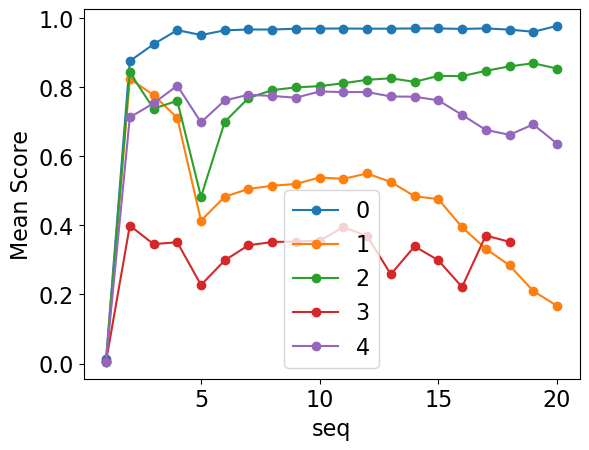

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

mean_scores_df = data_with_clusters.groupby(['cluster_5', 'seq'])['risk_1'].mean().reset_index()

for name, group in mean_scores_df.groupby('cluster_5'):
    plt.plot(group['seq'], group['risk_1'], marker='o', label=name)

plt.xlabel('seq')
plt.ylabel('Mean Score')
plt.legend()

plt.show()

In [113]:
import pandas as pd

df_st=data_with_clusters.groupby('stay_id').first()
result_counts = pd.DataFrame()

for i in range(5):
    counts = df_st[df_st['cluster_5'] == i]['result'].value_counts().reset_index()
    
    counts.columns = ['Result', f'Cluster_{i}_Count']
    
    if result_counts.empty:
        result_counts = counts
    else:
        result_counts = pd.merge(result_counts, counts, on='Result', how='outer')

result_counts = result_counts.fillna(0)

result_counts

,Result,Cluster_0_Count,Cluster_1_Count,Cluster_2_Count,Cluster_3_Count,Cluster_4_Count
0,hos,52921,5147,6774,2216,3780
1,ed,36668,5855,3981,4391,4605
2,icu,5985,77,273,55,130


In [55]:
import pandas as pd

# Assuming df_st is your DataFrame with columns "cluster_hos_6," "result," and "stay_id"
df_st = data_with_clusters.groupby('stay_id').first()
result_counts = pd.DataFrame()

for i in range(5):
    counts = df_st[df_st['cluster_hos_6'] == i]['result'].value_counts().reset_index()
    
    counts.columns = ['Result', f'Cluster_{i}_Count']
    
    if result_counts.empty:
        result_counts = counts
    else:
        result_counts = pd.merge(result_counts, counts, on='Result', how='outer')

result_counts = result_counts.fillna(0)

# Calculate the percentage for each cluster horizontally
for i in ['hos','ed','icu']:
    #cluster_column = f'Cluster_{i}_Count'
    total_count = result_counts[i].sum()
    result_counts[f'Cluster_{i}_Percentage'] = (result_counts[i] / total_count) * 100


result_counts


NameError: name 'hos' is not defined

In [146]:
data_with_clusters.to_csv('dtw_cluster_multi_risk_5.csv')

In [90]:
data_with_clusters.to_csv('dtw_cluster_risk2.0_10.csv')

In [91]:
data_with_clusters

,stay_id,sum,seq,cluster_10
0,30000012,0.091602,1,7
1,30000012,2.000000,2,7
2,30000012,1.999996,3,7
4,30000039,0.010269,1,7
5,30000039,1.981823,2,7
...,...,...,...,...
1156496,39999961,1.999644,2,7
1156497,39999961,1.999644,3,7
1156498,39999961,1.999901,4,7
1156499,39999961,1.998362,5,7


In [177]:
#data_with_clusters.to_csv('dtw_cluster_6.csv')

In [146]:
data_with_clusters = pd.merge(new_ML_result, pivot_data_1['cluster'], left_on='stay_id', right_index=True)

In [173]:
data_with_clusters

,stay_id,score,result,seq,cluster_5
0,30000012,0.040170,hos,1,2
1,30000012,1.000000,hos,2,2
2,30000012,0.999996,hos,3,2
4,30000039,0.000887,hos,1,2
5,30000039,0.983121,hos,2,2
...,...,...,...,...,...
1156496,39999961,0.990739,hos,2,2
1156497,39999961,0.990739,hos,3,2
1156498,39999961,0.999370,hos,4,2
1156499,39999961,0.990971,hos,5,2


In [144]:
pivot_data_1['cluster']

stay_id
30000012    2
30000039    2
30000094    2
30000177    2
30000202    2
           ..
39999835    2
39999863    2
39999933    2
39999953    2
39999961    2
Name: cluster, Length: 231717, dtype: int64

In [49]:
data_with_clusters

,stay_id,risk_1,result,seq,cluster_5
0,30000012,0.000338,hos,1,0
1,30000012,1.000000,hos,2,0
2,30000012,0.999987,hos,3,0
4,30000039,0.001308,hos,1,0
5,30000039,0.994633,hos,2,0
...,...,...,...,...,...
1156496,39999961,0.999970,hos,2,0
1156497,39999961,0.999970,hos,3,0
1156498,39999961,0.999851,hos,4,0
1156499,39999961,0.994424,hos,5,0


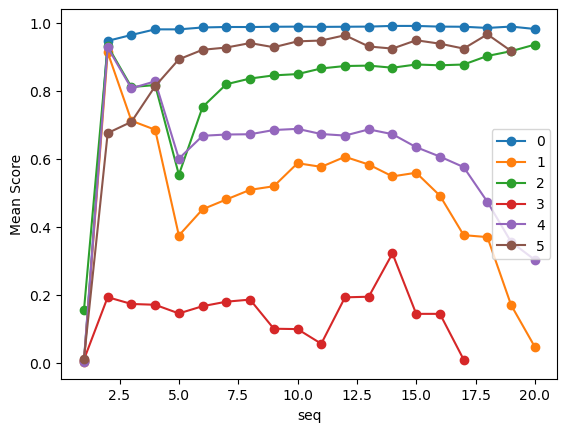

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

mean_scores_df = data_with_clusters.groupby(['cluster_6', 'seq'])['risk_1'].mean().reset_index()

for name, group in mean_scores_df.groupby('cluster_6'):
    plt.plot(group['seq'], group['risk_1'], marker='o', label=name)

plt.xlabel('seq')
plt.ylabel('Mean Score')
plt.legend()

plt.show()


In [163]:
data_with_clusters.to_csv('dtw_cluster_4.csv')

In [160]:
from tslearn.metrics import dtw
dtw_score = dtw([0,2], [0,1,4])

In [161]:
dtw_score

2.23606797749979

In [103]:
data_with_clusters[data_with_clusters['cluster']==1]

,stay_id,score,result,seq,cluster
3,30000038,0.000299,hos,1,1
24,30000254,0.000011,ed,1,1
35,30000275,0.000004,hos,1,1
36,30000275,0.434687,hos,2,1
37,30000275,0.074640,hos,3,1
...,...,...,...,...,...
1156390,39999113,0.275933,ed,4,1
1156395,39999191,0.000482,ed,1,1
1156426,39999599,0.000017,ed,1,1
1156427,39999599,0.491098,ed,2,1


In [35]:
df_st=data_with_clusters.groupby('stay_id').first()

In [40]:
a = pd.DataFrame(df_st[df_st['cluster_6'] == 5]['result'].value_counts())
a

,count
result,
ed,4269
hos,3830
icu,248


In [58]:
a = pd.DataFrame(df_st[df_st['cluster_5'] == 0]['result'].value_counts())
a

,count
result,
ed,93954
hos,85609
icu,9037


In [140]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Assuming you have already defined dtrain and dtest

# Define the parameter grid you want to search
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Create an XGBoost classifier
model = XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)

# Perform the grid search on your data
grid_search.fit(train_x, train_y)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   4.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   4.1s
[CV] END 